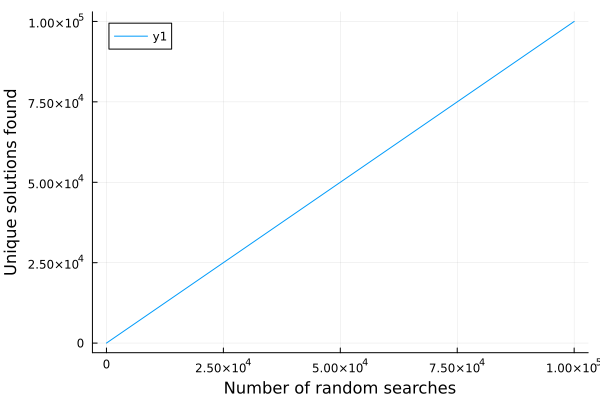

In [33]:
using Random, Plots

@enum Person Gulsah Paul Abhishek Ben Lucas Yuliia Caitlyn Amelia Xiaojie Brendan

assignments = Dict{Person, Set{Person}}()
for p in instances(Person)
    assignments[p] = Set([])
end

assignments[Gulsah] = Set([Abhishek])
assignments[Paul]= Set([Amelia, Yuliia])
assignments[Abhishek] = Set([Lucas, Gulsah])
assignments[Ben] = Set([Brendan])
assignments[Lucas] = Set([Abhishek])
assignments[Yuliia] = Set([Paul, Gulsah]) #  Lucas <-- counting this as an extra, otherwise it's unsolvable
assignments[Caitlyn] = Set([Brendan, Yuliia])
assignments[Amelia] = Set([Ben])
assignments[Xiaojie] = Set([Amelia])
assignments[Brendan] = Set([Caitlyn])

referees(assignments, person) = length(assignments[person])
refereeing(assignments, person) = sum(map(other -> in(person, assignments[other]), instances(Person)))


function legalMoves(assignments)
    legalMoves = []
    for source in instances(Person)
        for target in instances(Person)
            if referees(assignments, target) < 2 && refereeing(assignments, source) < 2 && !in(source, assignments[target]) && source != target
                push!(legalMoves, (source, target))
            end
        end
    end
    return legalMoves
end

function satisfiesConstraints(assignments)
    for person in instances(Person)
        if referees(assignments, person) < 2
            return false
        end
        if refereeing(assignments, person) < 2
            return false
        end
    end
    return true
end

function findAll(assignments) Vector{Dict{Person, Set{Person}}}
    
    moves = legalMoves(assignments)
    
    if isempty(moves)
        if satisfiesConstraints(assignments)
            return [assignments]
        else
            return []
        end
    else
        nextSolutions = []
        for (source, target) in moves
            newAssignments = deepcopy(assignments)
            push!(newAssignments[target], source)
            push!(nextSolutions, findAll(newAssignments))
        end
        return vcat(nextSolutions...)
    end
end
            
            

function randomSearch(assignments)
    newAssignments = deepcopy(assignments)
    while !satisfiesConstraints(newAssignments)
        newAssignments = deepcopy(assignments)
        moves = legalMoves(newAssignments)
        while !isempty(moves)
            source, target = rand(moves)
            push!(newAssignments[target], source)
            moves = legalMoves(newAssignments)
        end
    end
    return newAssignments
end

solutions = Set()

x = []
y = []
for i in 1:100000
    push!(solutions, randomSearch(assignments))
    push!(x, i)
    push!(y, length(solutions))
end

plot(x, y, xlabel="Number of random searches", ylabel="Unique solutions found")

In [32]:
solutions = Set(findAll(assignments))

LoadError: InterruptException:

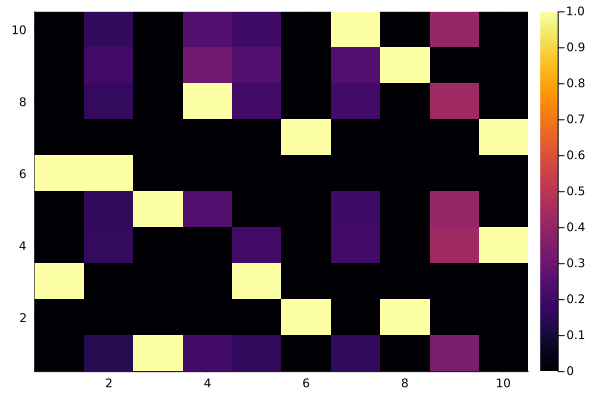

In [28]:
function grid(sols)
    g = zeros(Float64, (10, 10))
    for sol in sols
        for p in instances(Person)
            for p2 in sol[p]
                g[Int64(p)+1, Int64(p2)+1] += 1
            end
        end
    end
    return g
end

heatmap(grid(solutions)./length(solutions))

In [30]:
legalMoves(assignments)

25-element Vector{Any}:
 (Paul, Gulsah)
 (Paul, Ben)
 (Paul, Lucas)
 (Paul, Amelia)
 (Paul, Xiaojie)
 (Paul, Brendan)
 (Ben, Gulsah)
 (Ben, Lucas)
 (Ben, Xiaojie)
 (Ben, Brendan)
 (Lucas, Gulsah)
 (Lucas, Ben)
 (Lucas, Amelia)
 (Lucas, Xiaojie)
 (Lucas, Brendan)
 (Caitlyn, Gulsah)
 (Caitlyn, Ben)
 (Caitlyn, Lucas)
 (Caitlyn, Amelia)
 (Caitlyn, Xiaojie)
 (Xiaojie, Gulsah)
 (Xiaojie, Ben)
 (Xiaojie, Lucas)
 (Xiaojie, Amelia)
 (Xiaojie, Brendan)